In [87]:
!pip install scikit-image
!pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


1.1 Load the following image: 'Reduced Trainging data/8/4857.jpg' and visualise the result

In [88]:
from pathlib import Path
from skimage import io, feature, measure
import matplotlib.pyplot as plt
import numpy as np

from skimage.filters import threshold_otsu

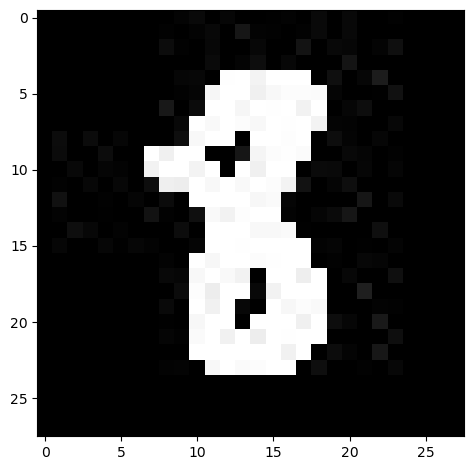

In [89]:
img = io.imread("Reduced MNIST Data/Reduced Trainging data/8/4857.jpg")

io.imshow(img)
plt.show()

1.2 Use the Canny edge detection method to detect the edges in the image that was loaded.

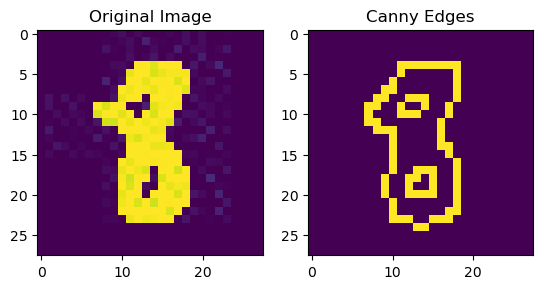

In [90]:
edges = feature.canny(img)

plt.figure()

plt.subplot(1,2,1)
plt.title("Original Image")
plt.imshow(img)

plt.subplot(1,2,2)
plt.title("Canny Edges")
plt.imshow(edges)


1.3 Use the label measure to detect how many edges there are in this image.

In [91]:
labels = measure.label(edges)
num_edges = labels.max()

print("Amount of edges:", num_edges)

Amount of edges: 3


1.4 Also calculate the following features based on the output of the canny edge detection: the height and width of the digit, the maximum number of pixels per column, the maximum number of pixels per row and the total number of pixels. This should give the output shown in 

In [92]:
pixels_per_column = np.sum(edges, axis=0)
pixels_per_column_max = max(pixels_per_column)

pixels_per_row = np.sum(edges, axis=1)
pixels_per_row_max = max(pixels_per_row)


first_pixel_row, last_pixel_row = -1, -1
for i in range(len(pixels_per_row)):
    if pixels_per_row[i] > 0:
        if first_pixel_row == -1:
            first_pixel_row = i
        last_pixel_row = i

digit_height = last_pixel_row - first_pixel_row + 1


first_pixel_column, last_pixel_column = -1, -1
for i in range(len(pixels_per_column)):
    if pixels_per_column[i] > 0:
        if first_pixel_column == -1:
            first_pixel_column = i
        last_pixel_column = i

digit_width = last_pixel_column - first_pixel_column + 1



print("Amount of edges:", num_edges)

print("\ndigit height:", digit_height)
print("total width:", digit_width)


print("\nPixels per column max:", pixels_per_column_max)
print("Pixels per row max:", pixels_per_row_max)

Amount of edges: 3

digit height: 21
total width: 12

Pixels per column max: 12
Pixels per row max: 8


1.5	Each group member should implement one additional feature that says something about the digit in the image. 


In [93]:
#1.5 Mexx - Toevoegen Euler characteristic → object & holes
binary = img > threshold_otsu(img)

objects = measure.label(binary, connectivity=1).max()
euler   = measure.euler_number(binary, connectivity=1)
holes   = objects - euler

print("objecten:", objects)
print("gaten:", holes)
print("euler:", euler)

objecten: 1
gaten: 2
euler: -1


In [94]:
# Jaap = Number of pixels upper and lower half

middle_row = int(len(pixels_per_row) / 2)

upper_pixels = np.sum(pixels_per_row[:middle_row])
lower_pixels = np.sum(pixels_per_row[middle_row:])

print("\nUpper half pixels:", upper_pixels)
print("Lower half pixels:", lower_pixels)


Upper half pixels: 40
Lower half pixels: 40


In [95]:
# serve

1.6 Create a function that calculates these features for a given image.

In [96]:
# 1.6
def extract_features(img):
    edges = feature.canny(img)
    labels = measure.label(edges)
    num_edges = int(labels.max())

    pixels_per_column = np.sum(edges, axis=0)
    pixels_per_row = np.sum(edges, axis=1)
    pixels_per_column_max = int(pixels_per_column.max()) if pixels_per_column.size else 0
    pixels_per_row_max = int(pixels_per_row.max()) if pixels_per_row.size else 0

    row_idx = np.where(pixels_per_row > 0)[0]
    digit_height = int(row_idx[-1] - row_idx[0] + 1) if row_idx.size else 0

    col_idx = np.where(pixels_per_column > 0)[0]
    digit_width = int(col_idx[-1] - col_idx[0] + 1) if col_idx.size else 0

    binary = img > threshold_otsu(img)
    objects = int(measure.label(binary, connectivity=1).max())
    euler = float(measure.euler_number(binary, connectivity=1))
    holes = float(objects - euler)

    middle_row = len(pixels_per_row) // 2
    upper_pixels = int(np.sum(pixels_per_row[:middle_row]))
    lower_pixels = int(np.sum(pixels_per_row[middle_row:]))

    return np.array([
        num_edges,
        digit_height,
        digit_width,
        pixels_per_column_max,
        pixels_per_row_max,
        objects,
        holes,
        euler,
        upper_pixels,
        lower_pixels,
    ], dtype=float)

1.7	For the original image, create a row vector with all pixel values. This can be done by the following code: img.reshape(784). Where ‘img’ is a 2D numpy array of the original image and ‘reshape’ will create a 1D array that is (28x28=) 784 elements long.


In [97]:
#1.7
row_vector = img.reshape(784)
print('row_vector:', row_vector)

row_vector: [  0   0   0   0   0   0   0   0   0   4   9   0   6   0   0   1   3   0
   9   0   8   0   0   2   0   0   0   0   0   0   0   0   0   0   0   0
   2   0   3   8   0  22   3   2   0   2   9   0   8   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0  12   2   0   7   0   0   7   0
   0  19   0   8   6   0   4  15   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0  10   0   4  13   0   7   0   0   0  20   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   6   7   0 254 255
 243 255 255 255   0  15   0   6  28   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   2   5 246 255 255 240 248 252 252 251   5   0   0
   1  17   0   0   0   0   0   0   0   0   0   0   0   0  24   0  11 255
 255 246 255 254 255 242 255   0   6  13   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   8 255 249 255 252 248 255 254 255 243   4
   3   0   0   7   0   0   0   0   0  12   0  11   0   6   0   0   0  14
 248 255 255   0 255 255 253 255   0  1

1.8 for the training dataset, we want to create two train sets.

a. Loop over all images and calculate the features for each image. Store these values in
the first dataset with the corresponding label. Use your code from exercise 1.6.



In [98]:
# 1.8 a
train_dir = Path("Reduced MNIST Data/Reduced Trainging data")
test_dir  = Path("Reduced MNIST Data/Reduced Testing data")
digits = range(10)

In [99]:
# 1.8 a
X_train_features = []
y_train = []

for d in digits:
    for img_path in sorted((train_dir / str(d)).glob("*.jpg")):
        img = io.imread(img_path)
        X_train_features.append(extract_features(img))
        y_train.append(d)

X_train_features = np.array(X_train_features)
y_train = np.array(y_train)

print("Train features:", X_train_features.shape, "y:", y_train.shape)

Train features: (10000, 10) y: (10000,)


b. Furthermore, also calculate the row vector representation of each image. Use your
code from exercise 1.7. Store these values in the second dataset.

In [100]:
# 1.8 b
X_train_pixels = []
y_train_pixels = []

for d in digits:
    for img_path in sorted((train_dir / str(d)).glob("*.jpg")):
        img = io.imread(img_path)
        X_train_pixels.append(img.reshape(784))
        y_train_pixels.append(d)

X_train_pixels = np.array(X_train_pixels)
y_train_pixels = np.array(y_train_pixels)

print("Train pixels:", X_train_pixels.shape, "y:", y_train_pixels.shape)

Train pixels: (10000, 784) y: (10000,)


c. Repeat these steps also for the test dataset.

In [101]:
# 1.8 c
X_test_features = []
X_test_pixels = []
y_test = []

for d in digits:
    for img_path in sorted((test_dir / str(d)).glob("*.jpg")):
        img = io.imread(img_path)

        X_test_features.append(extract_features(img))  # features (like 1.8a)
        X_test_pixels.append(img.reshape(784))         # pixels   (like 1.8b)
        y_test.append(d)

X_test_features = np.array(X_test_features)
X_test_pixels   = np.array(X_test_pixels)
y_test          = np.array(y_test)

print("Test features:", X_test_features.shape)
print("Test pixels  :", X_test_pixels.shape)
print("y_test       :", y_test.shape)
print("Digits in test:", np.unique(y_test))

Test features: (2000, 10)
Test pixels  : (2000, 784)
y_test       : (2000,)
Digits in test: [0 1 2 3 4 5 6 7 8 9]


Exercise 2: Descriptive feature model (statistics)

2.1 load your training set. Make a train and validation set based on the 80-20 rule.

In [102]:
# 2.1
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


X_train, X_val, y_train, y_val = train_test_split(
    X_test_features, y_test, test_size=0.8, random_state=42, stratify=y_train_labels
)

print("Training set shape:", X_train.shape)
print("Validation set shape:", X_val.shape)
print("Training labels shape:", y_train.shape)
print("Validation labels shape:", y_val.shape)

NameError: name 'y_train_labels' is not defined

2.2 Create a logistic regression model that predicts the digits based on the features calculated in
exercise 1.

In [ ]:
# 2.2
models = {}
num_classes = 10

for digit in range(num_classes):
    y_binary = (y_train == digit).astype(int)

    model = sm.Logit(y_binary, X_train_sm)
    result = model.fit(disp=False)

    models[digit] = result

print("Models trained for digits 0 to 9")

NameError: name 'y_train' is not defined

2.3 Calculate the success rate and make a confusion matrix. Interpret the results.

2.4 Calculate the success rate by using the data from the testset. Explain if your model is reliable
or not.

2.5 Calculate the sensitivity for each digit. This means that you use one digit (for example 5) as
the positive class and the other digits (for example 0, 1, 2, 3, 4, 6, 7, 8, 9) as the negative
class. You should end up with 10 sensitivity scores as each digit should be the positive class
exactly ones.

2.6 What feature is most important for predicting a 4? Explain based on the 𝑧-value of each
feature.

Exercise 3: Black box model (machine learning)

3.1 Do you think the black box approach will work better or worse than the descriptive features
approach. Discuss with your group and write down your conclusion. (State as hypotheses in
report)

In [ ]:

# 3.1 

# as a group we hypothesed that black box approach will work better than the descriptive features approach. We came to this conclusion because the black box approach uses all the given pixel data and has more detailed information about the digit shap. However the con is that it is more hard to interpret the results of the black box compared to the descriptive features approach.


3.2 Perform the same steps as Exercise 2. However, do not use the statsmodels package, but use
the sklearn variant of Logistic regression

3.3 Does your result match your answer from 3.1? Discuss with your group and write down your
conclusions.